# Setup and Load Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 30)

In [3]:
# https://www.kaggle.com/datasets/kabhishm/global-spotify-weekly-chart?resource=download
df = pd.read_csv("spotify_weekly_chart.csv")

# Data Inspection

In [17]:
# check out first 10 rows
df.head(10)

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
1,2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
2,3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
3,4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
4,5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155
5,6,=,Manuel Turizo,La Bachata,28,4,NaN,25879286,-1477809.0,693820743
6,7,=,Taylor Swift,Anti,12,1,(x3),24839659,-607201.0,458799904
7,8,+1,Arcángel,La Jumpa,6,8,NaN,24149297,249994.0,147015494
8,9,-1,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",27,1,(x9),21956111,-2494755.0,915813564
9,10,+1,Stephen Sanchez,Until I Found You,6,10,NaN,21822777,1666570.0,103784452


In [119]:
# get dimensions
df.shape

(200, 9)

In [121]:
# number of entries
df.size

1800

In [4]:
# summarize values
df.describe()

,Pos,Wks,Pk,Streams,Streams+,Total
count,200.000000,200.000000,200.000000,2.000000e+02,1.820000e+02,2.000000e+02
mean,100.500000,46.915000,40.395000,1.109910e+07,1.495678e+05,4.958258e+08
std,57.879185,62.280108,43.894792,5.553110e+06,1.418367e+06,6.056621e+08
min,1.000000,1.000000,1.000000,6.713045e+06,-3.443943e+06,6.713237e+06
25%,50.750000,9.750000,6.000000,7.720350e+06,-3.882400e+05,1.034072e+08
50%,100.500000,24.000000,23.000000,8.816404e+06,1.653155e+05,2.658862e+08
75%,150.250000,59.250000,64.000000,1.335638e+07,5.566680e+05,6.465569e+08
max,200.000000,310.000000,199.000000,4.728851e+07,7.621342e+06,3.291327e+09


In [122]:
# detailed summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   P+        200 non-null    object 
 1   Artist    200 non-null    object 
 2   Title     200 non-null    object 
 3   Wks       200 non-null    int64  
 4   Pk        200 non-null    int64  
 5   (x?)      200 non-null    object 
 6   Streams   200 non-null    int64  
 7   Streams+  182 non-null    float64
 8   Total     200 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 23.7+ KB


In [12]:
# check for any missing values
df.isna().sum()

Pos           0
P+            0
Artist        0
Title         0
Wks           0
Pk            0
(x?)        164
Streams       0
Streams+     18
Total         0
dtype: int64

In [4]:
# fill in missing values with something sensible
df['(x?)'] = df['(x?)'].fillna('(x0)')

In [97]:
print(df.index)
print(df.columns)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', name='Pos', length=200)
Index(['P+', 'Artist', 'Title', 'Wks', 'Pk', '(x?)', 'Streams', 'Streams+',
       'Total'],
      dtype='object')


# Common Functions

## Indexing

In [99]:
df.head()

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155


In [5]:
df = df.set_index('Pos')

In [101]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', name='Pos', length=200)

## Element Access

In [102]:
# get a specific column, output is a series
df["Title"]

Pos
1                                              Kill Bill
2                                               Creepin'
3                                                 Unholy
4                                              As It Was
5                                        I'm Good (Blue)
6                                             La Bachata
7                                                   Anti
8                                               La Jumpa
9                  Quevedo: Bzrp Music Sessions, Vol. 52
10                                     Until I Found You
11                                                 Ditto
12                                             Escapism.
13                                             Calm Down
14                                           golden hour
15                                          Another Love
16                                             Rich Flex
17                                       I Ain't Worried
18                         

In [103]:
# get several specific columns
df[['Artist', 'Title', 'Streams']]

# df['Artist', 'Title']          # this is an error, tries to find a column named with the tuple ('Artist', 'Title')

,Artist,Title,Streams
Pos,,,
1,SZA,Kill Bill,47288509
2,Metro Boomin,Creepin',30753658
3,Sam Smith,Unholy,30733283
4,Harry Styles,As It Was,28522200
5,David Guetta,I'm Good (Blue),27260313
6,Manuel Turizo,La Bachata,25879286
7,Taylor Swift,Anti,24839659
8,Arcángel,La Jumpa,24149297
9,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",21956111


In [105]:
# find all songs that peaked in the top 3
df[df['Pk'] < 3]

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155
7,=,Taylor Swift,Anti,12,1,(x3),24839659,-607201.0,458799904
9,-1,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",27,1,(x9),21956111,-2494755.0,915813564
16,-2,Drake,Rich Flex,10,2,(x1),19354054,-431589.0,265183146
23,-13,Bad Bunny,Me Porto Bonito,36,2,(x1),18132776,-2452416.0,1081103183


In [106]:
# access values by index and column label
df.loc[150, 'Title']

'Stargirl Interlude'

In [107]:
# access entire data row by index
df.loc[150]

P+                         +18
Artist             The Weeknd 
Title       Stargirl Interlude
Wks                         27
Pk                          42
(x?)                       NaN
Streams                7721235
Streams+              531899.0
Total                180583345
Name: 150, dtype: object

In [108]:
# access entire column by column label
df.loc[:, 'Title']

Pos
1                                              Kill Bill
2                                               Creepin'
3                                                 Unholy
4                                              As It Was
5                                        I'm Good (Blue)
6                                             La Bachata
7                                                   Anti
8                                               La Jumpa
9                  Quevedo: Bzrp Music Sessions, Vol. 52
10                                     Until I Found You
11                                                 Ditto
12                                             Escapism.
13                                             Calm Down
14                                           golden hour
15                                          Another Love
16                                             Rich Flex
17                                       I Ain't Worried
18                         

In [110]:
# Do the same things but just by row number and column number
df.iloc[100, 2]

'Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack]'

# Sorting and value counts

In [112]:
# sort rows by the most number of weeks on the charts, ties broken by peak
df.sort_values(by=["Wks", "Pk"], axis=0, ascending=False)

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
128,-10,Imagine Dragons,Believer,310,16,NaN,8214435,-4840.0,2323864824
102,+10,Ed Sheeran,Perfect,304,4,NaN,8805076,316633.0,2245579816
185,-9,Ed Sheeran,Shape of You,299,1,(x14),6911228,-188479.0,3234670723
173,RE,James Arthur,Say You Won't Let Go,283,7,NaN,7195612,NaN,1928060377
75,+17,Billie Eilish,lovely,247,24,NaN,9864315,938461.0,2029742349
166,+12,OneRepublic,Counting Stars,242,3,(x5),7381621,303657.0,979714976
116,+28,Vance Joy,Riptide,231,16,NaN,8552102,818904.0,943615125
184,+11,Post Malone,Sunflower,216,1,(x2),7010924,209189.0,2432366466
98,+40,Lewis Capaldi,Someone You Loved,209,4,NaN,8843090,1066231.0,2536275696


In [115]:
df['Artist'].value_counts()

The Weeknd                  9
SZA                         7
Bad Bunny                   7
Taylor Swift                6
Eminem                      5
Imagine Dragons             4
Ed Sheeran                  4
Metro Boomin                4
Arctic Monkeys              4
Quevedo                     3
Harry Styles                3
Coldplay                    3
NewJeans                    3
Feid                        3
Joji                        2
Rauw Alejandro              2
KAROL G                     2
Shakira                     2
Billie Eilish               2
BLACKPINK                   2
Lil Nas X                   2
Post Malone                 2
Bruno Mars                  2
Dua Lipa                    2
Steve Lacy                  2
Hotel Ugly                  2
Bizarrap                    2
Rema                        2
RAYE                        2
Stephen Sanchez             2
Sam Smith                   2
Drake                       2
d4vd                        2
OneRepubli

## Aggregations

Don't compute these statistics "manually" using for loops.
The library functions are vectorized and will run faster.

In [116]:
df['Streams'].mean()

11099104.19

In [117]:
df['Streams'].median()

8816404.0

In [118]:
df['Streams'].max()

47288509

In [123]:
# standard deviation
df['Streams'].std()

5553109.705064235

# Examples


Task: Find the artists with most appearances on the list and sort the dataset in decreasing order of number of appearances

In [ ]:
most_app_idx = df['Artist'].value_counts().index

In [45]:
l = [False] * (df.shape[0] - 1) + [True]

In [59]:
df.reset_index().set_index('Artist').loc[most_app_idx]

,Pos,P+,Title,Wks,Pk,(x?),Streams,Streams+,Total
The Weeknd,19,+4,Die For You,52,19,NaN,18785838,1175379.0,540570233
The Weeknd,49,+1,Starboy,133,1,(x6),13540082,818994.0,1353585964
The Weeknd,52,-10,Blinding Lights,163,1,(x13),12719479,-1359801.0,3291327093
The Weeknd,63,-1,I Was Never There,32,17,NaN,10824856,598406.0,304723168
The Weeknd,79,+9,Call Out My Name,64,1,(x1),9500339,490761.0,602334730
The Weeknd,88,+2,Save Your Tears,110,2,(x4),9212348,209927.0,1227315734
The Weeknd,133,+14,The Hills,154,3,(x1),8049869,418766.0,936592580
The Weeknd,150,+18,Stargirl Interlude,27,42,NaN,7721235,531899.0,180583345
The Weeknd,167,-62,Save Your Tears (Remix),40,43,NaN,7368432,-1202841.0,305526375
SZA,1,=,Kill Bill,5,1,(x2),47288509,5814143.0,208044297


Task: Convert the (x?) column into integers

In [125]:
df.dtypes

P+           object
Artist       object
Title        object
Wks           int64
Pk            int64
(x?)         object
Streams       int64
Streams+    float64
Total         int64
dtype: object

In [127]:
df['(x?)'] = df['(x?)'].apply(lambda s : s[2:-1])

In [129]:
df['(x?)'] = df['(x?)'].astype('int64')

In [130]:
df.dtypes

P+           object
Artist       object
Title        object
Wks           int64
Pk            int64
(x?)          int64
Streams       int64
Streams+    float64
Total         int64
dtype: object

In [131]:
df.head()

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,2,47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,1,30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,7,30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,11,28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,4,27260313,-3443943.0,568898155


# Visualization

Text(0, 0.5, 'Inverse of # Streams')

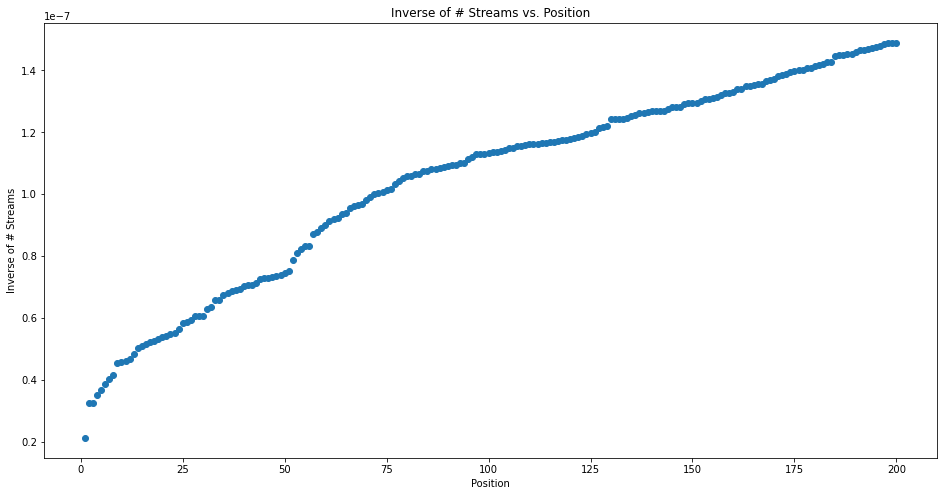

In [142]:
plt.figure(figsize=(16,8))


plt.scatter(df.index, 1 / df['Streams'])
plt.title("Inverse of # Streams vs. Position")
plt.xlabel("Position")
plt.ylabel("Inverse of # Streams")

Text(0, 0.5, 'Count')

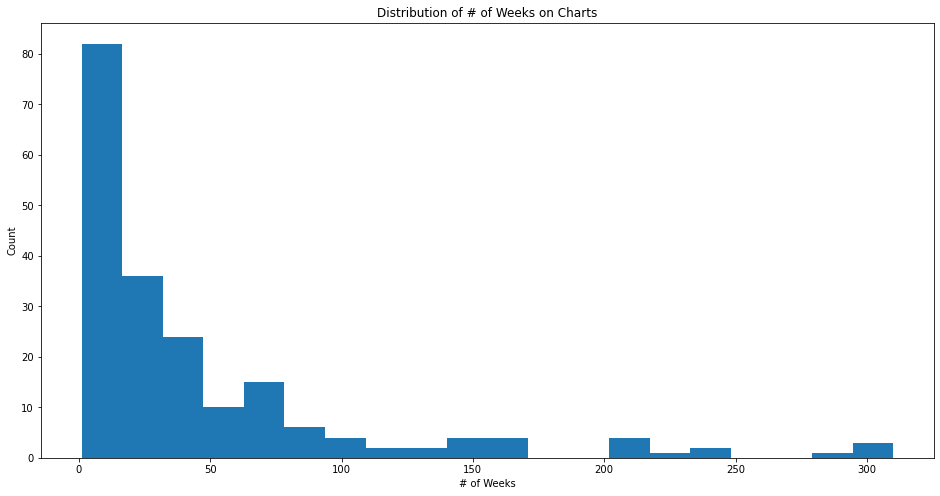

In [148]:
plt.figure(figsize=(16,8))

plt.hist(df["Wks"], bins=20)

plt.title("Distribution of # of Weeks on Charts")
plt.xlabel("# of Weeks")
plt.ylabel("Count")

In [6]:
# https://www.kaggle.com/datasets/achintyatripathi/yahoo-finance-apple-inc-aapl?select=AAPL_daily_update.csv
aapl_df = pd.read_csv("AAPL_daily_update.csv")

In [7]:
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-10,53.465000,54.195000,52.927502,54.174999,53.642761,127111600
1,2019-09-11,54.517502,55.927502,54.432499,55.897499,55.348343,177158400
2,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800
3,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200
4,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400


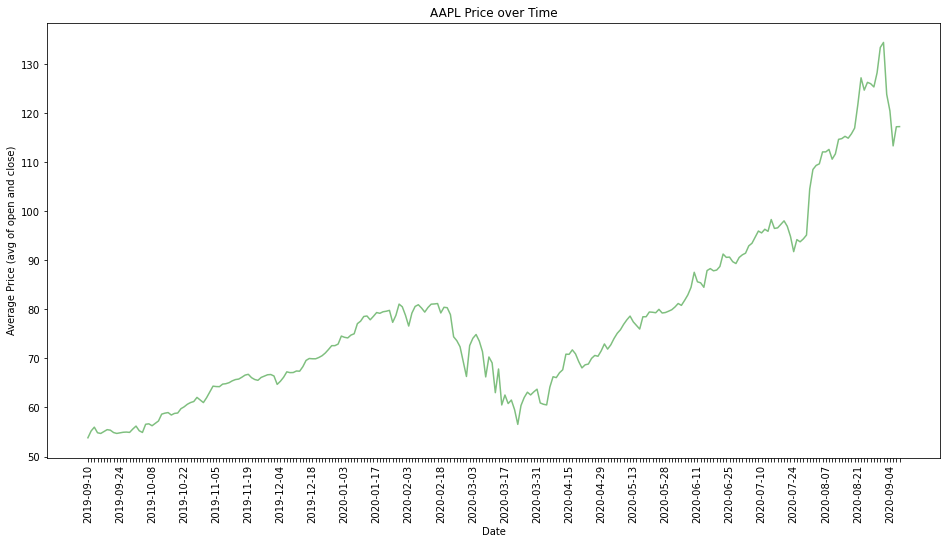

In [16]:
plt.figure(figsize=(16,8))

plt.plot(aapl_df.Date, (aapl_df.Open + aapl_df.Close) / 2, color="green", alpha=0.5)

plt.title("AAPL Price over Time")
plt.xlabel("Date")
plt.ylabel("Average Price (avg of open and close)")

# make x tick labels vertical
plt.xticks(rotation=90)

# don't show every date on x-axis
ax = plt.gca()

every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)



# Modeling

In [17]:
df.head()

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155


Hypothesis: # Wks spent on charts is positively correlated to total streams

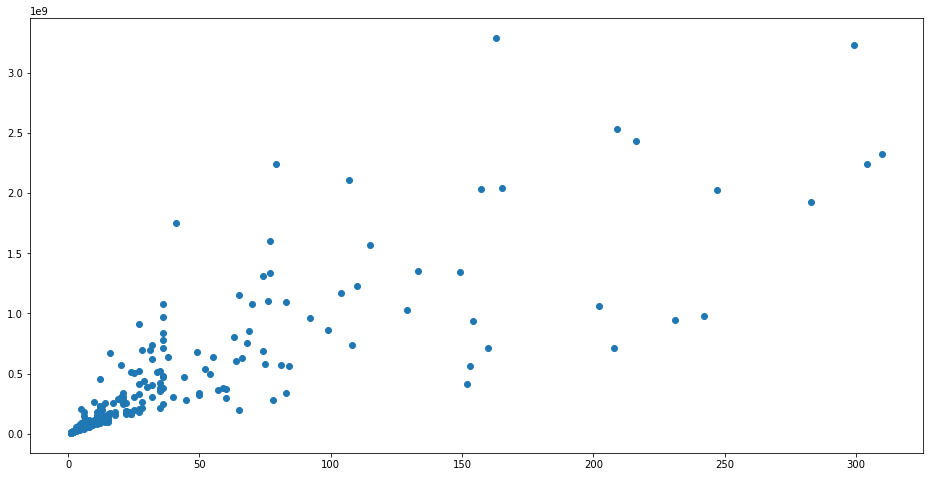

In [18]:
plt.figure(figsize=(16,8))

plt.scatter(df.Wks, df.Total)

In [20]:
regression_df = df[df.Wks > 10]

In [21]:
regression_df.shape

(146, 9)

In [24]:
# sm.OLS(y, X)
# there is no intercept term by default
model = sm.OLS(regression_df.Total, regression_df.Wks)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   4.615
Model:                            OLS   Adj. R-squared (uncentered):              4.640
Method:                 Least Squares   F-statistic:                             -185.1
Date:                Mon, 23 Jan 2023   Prob (F-statistic):                        1.00
Time:                        12:32:07   Log-Likelihood:                         -3108.1
No. Observations:                 146   AIC:                                      6218.
Df Residuals:                     145   BIC:                                      6221.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wks         8.875e+06   3.88e+05     22.853      0.000    8.11e+06    9.64e+06
==============================================================================
Omnibus:                       24.163   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.321
Skew:                           0.425   Prob(JB):                     2.71e-22
Kurtosis:                       6.950   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

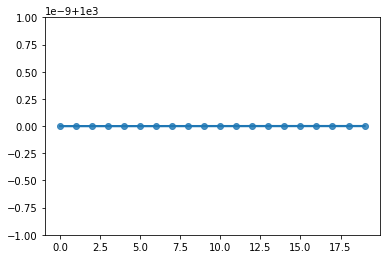

In [31]:
sns.regplot(x=[i for i in range(20)], y=[1000] * 20, fit_reg=True)

<AxesSubplot:xlabel='Wks', ylabel='Total'>

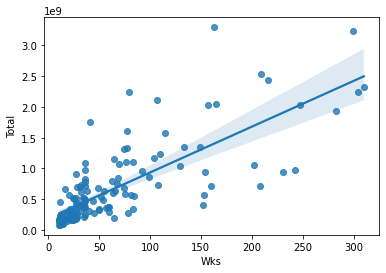

In [28]:
plt.figure(figsize=(16,8))

sns.regplot(data=regression_df, x="Wks", y="Total", fit_reg=True)